<a href="https://colab.research.google.com/github/qubitskz/public-datasets-workings/blob/master/Quick_draw_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir quickdraw-dataset

In [0]:
#making list of classes
classes = sorted(['airplane','apple','basket','brain','dog','scissors','see saw'])

In [0]:
#downlaoding dataset
import urllib.request
def download():
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace(' ', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'quickdraw-dataset/'+c.replace(' ','_')+'.npy')

download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/basket.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/brain.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/scissors.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/see%20saw.npy


In [0]:
!ls quickdraw-dataset

airplane.npy  basket.npy  dog.npy	see_saw.npy
apple.npy     brain.npy   scissors.npy


In [0]:
#Loading the dataset
import numpy as np
from sklearn.model_selection import train_test_split

X = np.empty([0,784],dtype=np.uint8)
y = np.empty([0],dtype=np.uint8)

max_samples = 5000
for idx,c in enumerate(classes):
  fpath = 'quickdraw-dataset/'+c.replace(' ','_')+'.npy'
  sample = np.load(fpath)
  
  X = np.concatenate((X,sample[:max_samples,:]), axis=0)
  y = np.append(y,np.full(max_samples,idx))

print('X shape',X.shape)
print('y shape',y.shape)


X shape (35000, 784)
y shape (35000,)


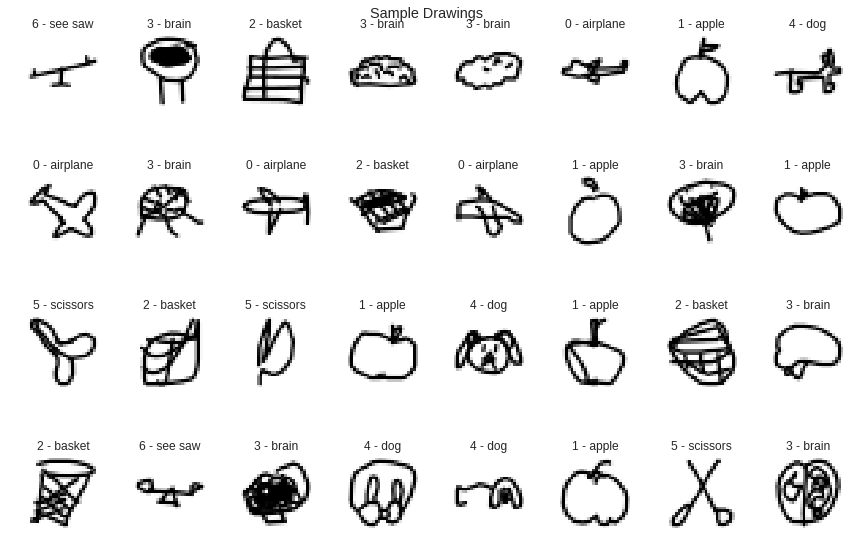

In [0]:
#Visualizing 

import matplotlib.pyplot as plt

grid = (4,8)

fig = plt.figure(figsize=(12,8))

for row in range(grid[0]):
  for col in range(grid[1]):
    plt.subplot(grid[0],grid[1],row*grid[1]+col+1)
    rand_idx = np.random.randint(0,X.shape[0])
    plt.imshow(X[rand_idx,:].reshape(-1,28))
    plt.axis('off')
    plt.grid('off')
    plt.title('%s - %s'%(y[rand_idx],classes[y[rand_idx]]))

plt.suptitle('Sample Drawings')
plt.tight_layout()
plt.show()
    

In [0]:
from sklearn.model_selection import train_test_split

X = X/255.0 
#Without this step the accuracy was fixed at ~ 14% for the fully connected model.
#Just with this step the accuracy went up to ~

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [0]:

#Buidling fully connected NN classification
from keras.layers import Dense, Input
from keras.models import Model

inputs = Input(shape=(784,))
fc1 = Dense(256, activation='relu',name='FC1')(inputs)
fc2 = Dense(128,activation='relu',name='FC2')(fc1)
fc3 = Dense(64,activation='relu',name='FC3')(fc2)
preds = Dense(len(classes),activation='softmax',name='Softmax')(fc3)

fc_model = Model(inputs=inputs,outputs=preds)

fc_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fc_model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
FC1 (Dense)                  (None, 256)               200960    
_________________________________________________________________
FC2 (Dense)                  (None, 128)               32896     
_________________________________________________________________
FC3 (Dense)                  (None, 64)                8256      
_________________________________________________________________
Softmax (Dense)              (None, 7)                 455       
Total params: 242,567
Trainable params: 242,567
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Model Training
history = fc_model.fit(x_train, y_train, validation_split=0.25, epochs=20, batch_size=16, verbose=1)

Train on 21000 samples, validate on 7000 samples
Epoch 1/20
21000/21000 [==============================] - 11s 528us/step - loss: 0.7426 - acc: 0.7525 - val_loss: 0.6539 - val_acc: 0.7753
Epoch 2/20
21000/21000 [==============================] - 9s 429us/step - loss: 0.5198 - acc: 0.8273 - val_loss: 0.5497 - val_acc: 0.8174
Epoch 3/20
21000/21000 [==============================] - 9s 431us/step - loss: 0.4143 - acc: 0.8636 - val_loss: 0.5391 - val_acc: 0.8239
Epoch 4/20
21000/21000 [==============================] - 9s 428us/step - loss: 0.3369 - acc: 0.8887 - val_loss: 0.5710 - val_acc: 0.8207
Epoch 5/20
21000/21000 [==============================] - 9s 427us/step - loss: 0.2770 - acc: 0.9091 - val_loss: 0.6062 - val_acc: 0.8231
Epoch 6/20
21000/21000 [==============================] - 9s 428us/step - loss: 0.2252 - acc: 0.9253 - val_loss: 0.6349 - val_acc: 0.8304
Epoch 7/20
21000/21000 [==============================] - 9s 425us/step - loss: 0.1918 - acc: 0.9355 - val_loss: 0.6348 - 

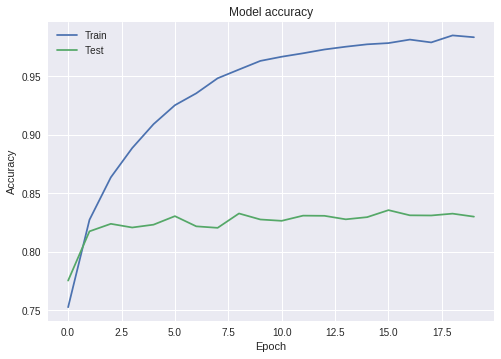

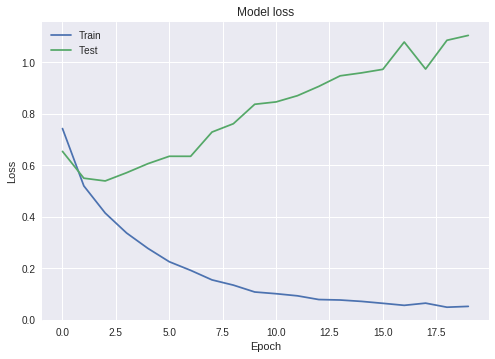

In [0]:

#Learning curve viz
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
test_loss,test_accuracy = fc_model.evaluate(x_test,y_test)
print('Test Accuracy is: %s'%test_accuracy)

7000/7000 [==============================] - 0s 70us/step
Test Accuracy is: 0.835571428503309


Confusion matrix, without normalization
[[777   0  13  19  78  27  49]
 [  3 939  17  14  14   7   1]
 [ 10  16 874  56  50  10   8]
 [ 11   6  78 868  45   9   8]
 [ 49   5  47  74 753  22  63]
 [ 46   3  14  16  72 806  33]
 [ 24   1  10  16  78  29 832]]




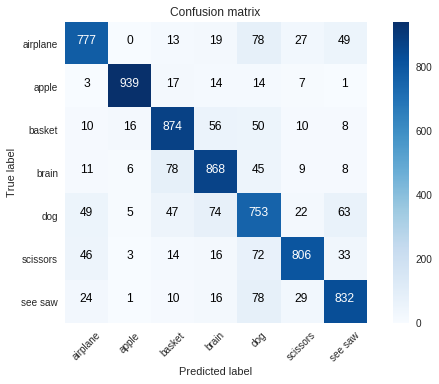

In [0]:
#Error Analysis
from sklearn.metrics import confusion_matrix
import itertools


y_preds = np.argmax(fc_model.predict(x_test),axis=1)

cm = confusion_matrix(y_test,y_preds)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print()
    print()

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid('off')
    plt.tight_layout()

plot_confusion_matrix(cm,classes)


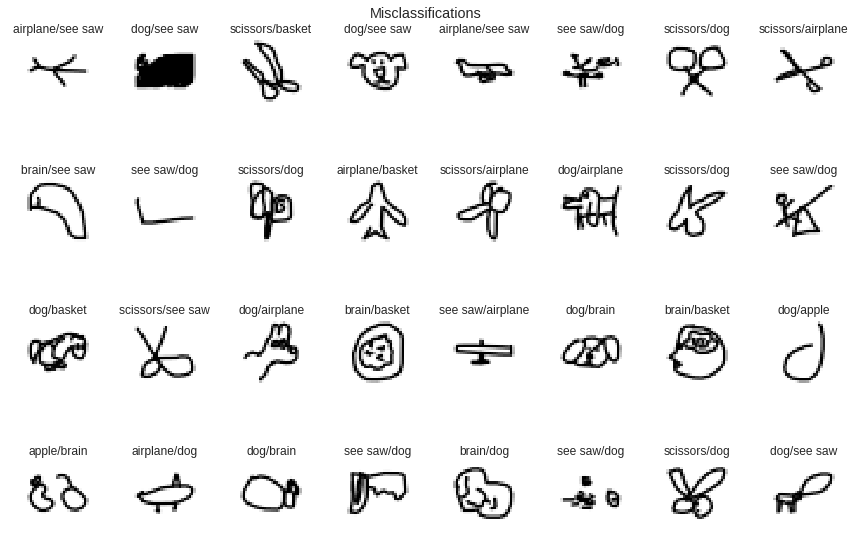

In [0]:

#seeing misclassification samples
grid = (4,8)

fig = plt.figure(figsize=(12,8))

mis_examples = x_test[y_test != y_preds,:]
actual_labels = y_test[y_test != y_preds]
pred_labels = y_preds[y_test != y_preds]

for row in range(grid[0]):
  for col in range(grid[1]):
    plt.subplot(grid[0],grid[1],row*grid[1]+col+1)
    rand_idx = np.random.randint(mis_examples.shape[0])
    plt.imshow(mis_examples[rand_idx,:].reshape(-1,28))
    plt.axis('off')
    plt.grid('off')
    plt.title('%s/%s'%(classes[actual_labels[rand_idx]],classes[pred_labels[rand_idx]]))

plt.suptitle('Misclassifications')
plt.tight_layout()
plt.show()